# TSNE Ripser


In [65]:
import glob
import json 
import os
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import random
from tqdm import tqdm 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import numpy as np


In [17]:

def convert_data_to_TSNE(data, num_output_dims=2):
    """
    Convert data to TSNE using the TSNE algorithm from scikit-learn
    """

    # Configure the t-SNE model
    tsne = TSNE(n_components=num_output_dims, init='pca', random_state=42)

    # Fit the model and transform the data
    tsne_result = tsne.fit_transform(data)

    return tsne_result



In [54]:

def count_connected_components(dataset, epsilon):
    """
    Count the number of connected components in a dataset using epsilon-radius balls.

    Args:
        dataset (torch.Tensor or np.ndarray): Dataset of shape (n_points, d).
        epsilon (float): Radius for epsilon-balls to determine connectivity.

    Returns:
        int: Number of connected components.
    """
    # Ensure data is in numpy format
    if isinstance(dataset, torch.Tensor):
        data = dataset.numpy()
    elif isinstance(dataset, np.ndarray):
        data = dataset
    else:
        raise ValueError("Dataset must be a torch.Tensor or np.ndarray")

    # Compute persistence diagram
    result = ripser(data, maxdim=0, thresh=epsilon)
    diagrams = result['dgms']
    diagram_h0 = diagrams[0]

    # Count connected components properly
    # Consider every birth-death pair where death time is infinity or greater than birth plus a small threshold
    num_components = np.sum(diagram_h0[:, 1] == np.inf)
    return num_components



4
1


[[ -4.520676    53.41993     -5.1866994 ]
 [  7.5352407   33.459965    18.16243   ]
 [-36.23214     -0.38250688 -28.217152  ]
 ...
 [ 11.207549     0.10849215 -21.368359  ]
 [ -4.913271    31.468702    23.572641  ]
 [  5.0688686  -41.900406    29.15122   ]]


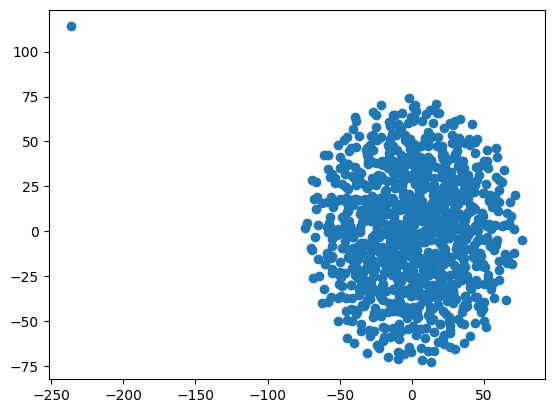

In [79]:
dummy_data = torch.randn(1024, 4096)
tsne_data = convert_data_to_TSNE(dummy_data.numpy(), num_output_dims=3)
print(tsne_data)
plt.rcParams.update({
    "text.usetex": False
})
# Plot the data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()


In [76]:
cmp = []
for epsilon in np.arange(0, 1, 0.005):
    cmp += [count_connected_components(tsne_data, epsilon=epsilon)]

plt.line(np.arange(0, 1, 0.005), cmp)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'